In [1]:
import pandas as pd
import numpy as np

In [2]:
#Import the files
aisles_df = pd.read_csv('aisles.csv')
products_df = pd.read_csv('products.csv')
orders_df = pd.read_csv('orders.csv')
order_products_prior_df = pd.read_csv('order_products__prior.csv')
departments_df = pd.read_csv('departments.csv')
order_products_train_df = pd.read_csv('order_products__train.csv')

In [3]:
aisles_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
aisle_id    134 non-null int64
aisle       134 non-null object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


In [4]:
order_products_train_df = order_products_train_df.merge(orders_df.drop('eval_set', axis=1), on='order_id')
order_products_prior_df = order_products_prior_df.merge(orders_df.drop('eval_set', axis=1), on='order_id')

In [5]:
order_products_train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1384617 entries, 0 to 1384616
Data columns (total 9 columns):
order_id                  1384617 non-null int64
product_id                1384617 non-null int64
add_to_cart_order         1384617 non-null int64
reordered                 1384617 non-null int64
user_id                   1384617 non-null int64
order_number              1384617 non-null int64
order_dow                 1384617 non-null int64
order_hour_of_day         1384617 non-null int64
days_since_prior_order    1384617 non-null float64
dtypes: float64(1), int64(8)
memory usage: 105.6 MB


In [6]:
order_products_prior_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32434489 entries, 0 to 32434488
Data columns (total 9 columns):
order_id                  int64
product_id                int64
add_to_cart_order         int64
reordered                 int64
user_id                   int64
order_number              int64
order_dow                 int64
order_hour_of_day         int64
days_since_prior_order    float64
dtypes: float64(1), int64(8)
memory usage: 2.4 GB


In [7]:
order_products_prior_df.head()

,order_id,product_id,add_to_cart_order,reordered,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2,33120,1,1,202279,3,5,9,8.0
1,2,28985,2,1,202279,3,5,9,8.0
2,2,9327,3,0,202279,3,5,9,8.0
3,2,45918,4,1,202279,3,5,9,8.0
4,2,30035,5,0,202279,3,5,9,8.0


In [9]:
orders_df.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [10]:
order_products_user=order_products_prior_df.groupby(["user_id","product_id"])["add_to_cart_order"].mean().reset_index().rename(columns={"add_to_cart_order":"avg_user_aco"})

In [11]:
temp=order_products_prior_df.groupby("product_id")["add_to_cart_order"].mean().reset_index()

In [12]:
order_products_user=order_products_user.merge(temp,on="product_id").rename(columns={"add_to_cart_order":"avg_aco"})

In [13]:
order_products_user.head()

,user_id,product_id,avg_user_aco,avg_aco
0,1,196,1.400000,3.721774
1,15,196,2.200000,3.721774
2,19,196,6.333333,3.721774
3,21,196,2.000000,3.721774
4,31,196,15.500000,3.721774


In [14]:
del temp

In [15]:
temp=order_products_prior_df.groupby(["user_id","product_id"])["add_to_cart_order"].count().reset_index().rename(columns={"add_to_cart_order":"user_purchases"})

In [16]:
temp.head()

,user_id,product_id,user_purchases
0,1,196,10
1,1,10258,9
2,1,10326,1
3,1,12427,10
4,1,13032,3


In [17]:
order_products_user=order_products_user.merge(temp,on=["user_id","product_id"])

In [18]:
order_products_user=order_products_user.rename(columns={"user_purchases":"user_prod_purchases"})

In [19]:
order_products_user.head()

,user_id,product_id,avg_user_aco,avg_aco,user_prod_purchases
0,1,196,1.400000,3.721774,10
1,15,196,2.200000,3.721774,5
2,19,196,6.333333,3.721774,3
3,21,196,2.000000,3.721774,1
4,31,196,15.500000,3.721774,2


In [20]:
temp=order_products_prior_df.groupby("user_id")["product_id"].count().reset_index().rename(columns={"product_id":"user_purchases"})

In [22]:
temp.head()

,user_id,user_purchases
0,1,59
1,2,195
2,3,88
3,4,18
4,5,37


In [23]:
order_products_user=order_products_user.merge(temp,on="user_id")

In [24]:
order_products_user.head()

,user_id,product_id,avg_user_aco,avg_aco,user_prod_purchases,user_purchases
0,1,196,1.400000,3.721774,10,59
1,1,10258,3.333333,4.277492,9,59
2,1,10326,5.000000,4.191097,1,59
3,1,12427,3.300000,4.760037,10,59
4,1,13032,6.333333,5.622767,3,59


In [25]:
del temp

In [26]:
temp=order_products_prior_df.groupby(["user_id","product_id"])["days_since_prior_order"].mean().reset_index()

In [28]:
temp.head()

,user_id,product_id,days_since_prior_order
0,1,196,19.555556
1,1,10258,19.555556
2,1,10326,28.000000
3,1,12427,19.555556
4,1,13032,21.666667


In [29]:
order_products_user=order_products_user.merge(temp,on=["user_id","product_id"])

In [30]:
order_products_user.head()

,user_id,product_id,avg_user_aco,avg_aco,user_prod_purchases,user_purchases,days_since_prior_order
0,1,196,1.400000,3.721774,10,59,19.555556
1,1,10258,3.333333,4.277492,9,59,19.555556
2,1,10326,5.000000,4.191097,1,59,28.000000
3,1,12427,3.300000,4.760037,10,59,19.555556
4,1,13032,6.333333,5.622767,3,59,21.666667


Have to build some recency into features

In [31]:
order_products_user["user_prod_purch_ratio"]=order_products_user["user_prod_purchases"]/order_products_user["user_purchases"]

In [32]:
order_products_user.head()

,user_id,product_id,avg_user_aco,avg_aco,user_prod_purchases,user_purchases,days_since_prior_order,user_prod_purch_ratio
0,1,196,1.400000,3.721774,10,59,19.555556,0.169492
1,1,10258,3.333333,4.277492,9,59,19.555556,0.152542
2,1,10326,5.000000,4.191097,1,59,28.000000,0.016949
3,1,12427,3.300000,4.760037,10,59,19.555556,0.169492
4,1,13032,6.333333,5.622767,3,59,21.666667,0.050847


In [33]:
temp=order_products_prior_df.groupby(["user_id","order_number"])["add_to_cart_order"].count().reset_index()

In [34]:
temp=temp.groupby("user_id")["add_to_cart_order"].mean().reset_index()

In [35]:
temp.head()

,user_id,add_to_cart_order
0,1,5.900000
1,2,13.928571
2,3,7.333333
3,4,3.600000
4,5,9.250000


In [36]:
order_products_user=order_products_user.merge(temp,on="user_id")

In [37]:
order_products_user=order_products_user.rename(columns={"add_to_cart_order":"avg_cart_size"})

In [38]:
order_products_user.head()

,user_id,product_id,avg_user_aco,avg_aco,user_prod_purchases,user_purchases,days_since_prior_order,user_prod_purch_ratio,avg_cart_size
0,1,196,1.400000,3.721774,10,59,19.555556,0.169492,5.9
1,1,10258,3.333333,4.277492,9,59,19.555556,0.152542,5.9
2,1,10326,5.000000,4.191097,1,59,28.000000,0.016949,5.9
3,1,12427,3.300000,4.760037,10,59,19.555556,0.169492,5.9
4,1,13032,6.333333,5.622767,3,59,21.666667,0.050847,5.9


In [39]:
del temp

In [40]:
order_products_user["avg_inv_aco_ratio"]=order_products_user["avg_aco"]/order_products_user["avg_user_aco"]

In [41]:
order_products_user.head()

,user_id,product_id,avg_user_aco,avg_aco,user_prod_purchases,user_purchases,days_since_prior_order,user_prod_purch_ratio,avg_cart_size,avg_inv_aco_ratio
0,1,196,1.400000,3.721774,10,59,19.555556,0.169492,5.9,2.658410
1,1,10258,3.333333,4.277492,9,59,19.555556,0.152542,5.9,1.283248
2,1,10326,5.000000,4.191097,1,59,28.000000,0.016949,5.9,0.838219
3,1,12427,3.300000,4.760037,10,59,19.555556,0.169492,5.9,1.442435
4,1,13032,6.333333,5.622767,3,59,21.666667,0.050847,5.9,0.887805


In [42]:
temp=order_products_prior_df.groupby(["user_id"])["order_number"].max().reset_index()

In [43]:
temp.head()

,user_id,order_number
0,1,10
1,2,14
2,3,12
3,4,5
4,5,4


In [44]:
order_products_user=order_products_user.merge(temp,on="user_id")

In [45]:
del temp

In [46]:
order_products_user.head()

,user_id,product_id,avg_user_aco,avg_aco,user_prod_purchases,user_purchases,days_since_prior_order,user_prod_purch_ratio,avg_cart_size,avg_inv_aco_ratio,order_number
0,1,196,1.400000,3.721774,10,59,19.555556,0.169492,5.9,2.658410,10
1,1,10258,3.333333,4.277492,9,59,19.555556,0.152542,5.9,1.283248,10
2,1,10326,5.000000,4.191097,1,59,28.000000,0.016949,5.9,0.838219,10
3,1,12427,3.300000,4.760037,10,59,19.555556,0.169492,5.9,1.442435,10
4,1,13032,6.333333,5.622767,3,59,21.666667,0.050847,5.9,0.887805,10


In [47]:
order_products_user=order_products_user.rename(columns={"order_number":"total_orders"})

In [48]:
order_products_user=order_products_user.drop(["user_purchases"],axis=1)

In [49]:
order_products_user.head()

,user_id,product_id,avg_user_aco,avg_aco,user_prod_purchases,days_since_prior_order,user_prod_purch_ratio,avg_cart_size,avg_inv_aco_ratio,total_orders
0,1,196,1.400000,3.721774,10,19.555556,0.169492,5.9,2.658410,10
1,1,10258,3.333333,4.277492,9,19.555556,0.152542,5.9,1.283248,10
2,1,10326,5.000000,4.191097,1,28.000000,0.016949,5.9,0.838219,10
3,1,12427,3.300000,4.760037,10,19.555556,0.169492,5.9,1.442435,10
4,1,13032,6.333333,5.622767,3,21.666667,0.050847,5.9,0.887805,10


In [50]:
order_avg_aco_buys=order_products_user.groupby(["product_id","avg_aco"])["user_prod_purchases"].sum().reset_index()

In [51]:
order_avg_aco_buys.head()
# The below table gives information about a product, its average position of being added to cart, and total number of purchases
# of the product. Idea is to see if avg_aco correlates with the total number of times it has been ordered. 
# Do we expect items which are ordered a lot to be added sooner to the cart (smaller avg_aco)

,product_id,avg_aco,user_prod_purchases
0,1,5.801836,1852
1,2,9.888889,90
2,3,6.415162,277
3,4,9.507599,329
4,5,6.466667,15


In [52]:
order_avg_aco_buys[order_avg_aco_buys["user_prod_purchases"]>=500].sort_values("user_prod_purchases",ascending=False).head(50)
# Examine only those products which have been bought atleast 500 times. Reason is because some products may not be very popular

,product_id,avg_aco,user_prod_purchases
24848,24852,4.894129,472565
13172,13176,5.095947,379450
21133,21137,7.248902,264683
21899,21903,7.429640,241921
47198,47209,6.775011,213584
47755,47766,6.444617,176815
47615,47626,7.948617,152657
16793,16797,7.116096,142951
26204,26209,8.581823,140627
27839,27845,5.434749,137905


In [73]:
order_avg_aco_buys[order_avg_aco_buys["user_prod_purchases"]>=500].sort_values("avg_aco").head(5)
# Seeing products which have low avg_aco (or are typically added first)

,product_id,avg_aco,user_prod_purchases
35464,35470,2.688948,2244
42783,42791,2.746667,600
20936,20940,2.881251,8438
11881,11885,2.902956,1556
26895,26900,3.012999,2231


In [53]:
temp=order_products_prior_df.groupby(["product_id"])["days_since_prior_order"].mean().reset_index()

In [54]:
temp.head()

,product_id,days_since_prior_order
0,1,10.432725
1,2,10.482759
2,3,10.565385
3,4,14.686207
4,5,12.428571


In [55]:
order_avg_aco_buys=order_avg_aco_buys.merge(temp,on="product_id")

In [56]:
order_avg_aco_buys.head()

,product_id,avg_aco,user_prod_purchases,days_since_prior_order
0,1,5.801836,1852,10.432725
1,2,9.888889,90,10.482759
2,3,6.415162,277,10.565385
3,4,9.507599,329,14.686207
4,5,6.466667,15,12.428571


In [57]:
order_avg_aco_buys[order_avg_aco_buys["user_prod_purchases"]>=500].sort_values("avg_aco").head()
# also added the average days_since_prior_order into the table to see if there is any relation

,product_id,avg_aco,user_prod_purchases,days_since_prior_order
35464,35470,2.688948,2244,11.694907
42783,42791,2.746667,600,17.731532
20936,20940,2.881251,8438,13.620976
11881,11885,2.902956,1556,13.437500
26895,26900,3.012999,2231,15.139378


In [73]:
temp=order_products_user.groupby("product_id")["user_id"].nunique().reset_index()

In [63]:
temp.head()

,product_id,user_id
0,1,716
1,2,78
2,3,74
3,4,182
4,5,6


In [74]:
order_avg_aco_buys=order_avg_aco_buys.merge(temp,on="product_id").rename(columns={"user_id":"unique_users"})

In [75]:
order_avg_aco_buys.head()

,product_id,avg_aco,user_prod_purchases,days_since_prior_order,unique_users
0,1,5.801836,1852,10.432725,716
1,2,9.888889,90,10.482759,78
2,3,6.415162,277,10.565385,74
3,4,9.507599,329,14.686207,182
4,5,6.466667,15,12.428571,6


In [76]:
order_avg_aco_buys["weird_factor"]=(order_avg_aco_buys["user_prod_purchases"]/order_avg_aco_buys["unique_users"])*order_avg_aco_buys["days_since_prior_order"]
# Calculating a product related parameter which i am calling weird_factor for now. I want to find products which are popular among only certain type of 
# consumers (so i take the ratio of total times the product was bought and the number of unique users who bought the product)
# I also want to multiply this with the average days since prior order because some items which are bought infrequently
# (higher average days since prior order) but are popular among certain users may tend to get added sooner to cart because we 
# dont want to forget these items while ordering

In [78]:
order_avg_aco_buys[order_avg_aco_buys["user_prod_purchases"]>=500].sort_values("avg_aco").head()

,product_id,avg_aco,user_prod_purchases,days_since_prior_order,unique_users,weird_factor
35464,35470,2.688948,2244,11.694907,389,67.463681
42783,42791,2.746667,600,17.731532,220,48.358722
20936,20940,2.881251,8438,13.620976,1398,82.213015
11881,11885,2.902956,1556,13.437500,394,53.067893
26895,26900,3.012999,2231,15.139378,782,43.191756


In [79]:
order_avg_aco_buys[order_avg_aco_buys["user_prod_purchases"]>=500].sort_values("weird_factor",ascending=False).head()

,product_id,avg_aco,user_prod_purchases,days_since_prior_order,unique_users,weird_factor
20936,20940,2.881251,8438,13.620976,1398,82.213015
17920,17924,3.118581,1889,16.133141,431,70.708825
24848,24852,4.894129,472565,10.888331,73956,69.574395
38681,38689,4.715083,35663,10.115666,5325,67.747420
35464,35470,2.688948,2244,11.694907,389,67.463681


In [80]:
order_avg_aco_buys=order_avg_aco_buys.merge(products_df,on="product_id").drop(["aisle_id","department_id"],axis=1)

In [88]:
order_avg_aco_buys_temp=order_avg_aco_buys[order_avg_aco_buys["user_prod_purchases"]>=1000].sort_values("weird_factor",ascending=False)

In [89]:
order_avg_aco_buys_temp["avg_aco"].corr(order_avg_aco_buys_temp["weird_factor"])

-0.6698400874123291

/This very primitive calculation indicates a moderate negative correlation between add_to_cart_order and the weird factor we calculated. The motivation to calculate this "weird factor" was to see if there are some items which are ordered infrequently but whenever they are ordered, they are added to cart earlier by users. I wanted to penalize items which are ordered frequently..reason being is that when a product is associated with a certain set of customers (total_orders/number of unique users : lets say baby food is always ordered but only by only certain set of users... so having less number of unique orders but more products makes the food more popular amont those people or say pads for women) then it is likely that we may add them sooner into the cart lest we forget them  ... does it make sense? A -0.67 correlation is not bad right? Is this a real thing ? 

In [90]:
order_avg_aco_buys["weird_factor2"]=(order_avg_aco_buys["user_prod_purchases"]/order_avg_aco_buys["unique_users"])

In [91]:
order_avg_aco_buys_temp=order_avg_aco_buys[order_avg_aco_buys["user_prod_purchases"]>=1000]

In [92]:
order_avg_aco_buys_temp["avg_aco"].corr(order_avg_aco_buys_temp["weird_factor2"])

-0.5923870821056724

We can see that adding that extra factor of time improves the pearson correlation. without the extra factor our correlation coefficient is slightly lesser . 

In [93]:
order_avg_aco_buys.head()

,product_id,avg_aco,user_prod_purchases,days_since_prior_order,unique_users,weird_factor,product_name,weird_factor2
0,1,5.801836,1852,10.432725,716,26.985205,Chocolate Sandwich Cookies,2.586592
1,2,9.888889,90,10.482759,78,12.095491,All-Seasons Salt,1.153846
2,3,6.415162,277,10.565385,74,39.548805,Robust Golden Unsweetened Oolong Tea,3.743243
3,4,9.507599,329,14.686207,182,26.548143,Smart Ones Classic Favorites Mini Rigatoni Wit...,1.807692
4,5,6.466667,15,12.428571,6,31.071429,Green Chile Anytime Sauce,2.500000


In [94]:
order_avg_aco_buys[order_avg_aco_buys["user_prod_purchases"]>=500].sort_values("avg_aco").head()

,product_id,avg_aco,user_prod_purchases,days_since_prior_order,unique_users,weird_factor,product_name,weird_factor2
35464,35470,2.688948,2244,11.694907,389,67.463681,Water Mineral,5.768638
42783,42791,2.746667,600,17.731532,220,48.358722,Minis to Go Natural Spring Water,2.727273
20936,20940,2.881251,8438,13.620976,1398,82.213015,Organic Low Fat Milk,6.035765
11881,11885,2.902956,1556,13.437500,394,53.067893,"Sparkling Water, Bottles",3.949239
26895,26900,3.012999,2231,15.139378,782,43.191756,USDA AA Extra Large Eggs,2.852941


Not sure why I did this analysis lol...Not even sure if add to cart order is so important...

Let us do some visual EDA on the variable of interest "Reordered" 

# Now let us do some visual EDA on the variable of interest  "Reordered"

In [101]:
order_products_prior_df.head()

,order_id,product_id,add_to_cart_order,reordered,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2,33120,1,1,202279,3,5,9,8.0
1,2,28985,2,1,202279,3,5,9,8.0
2,2,9327,3,0,202279,3,5,9,8.0
3,2,45918,4,1,202279,3,5,9,8.0
4,2,30035,5,0,202279,3,5,9,8.0


In [102]:
temp=order_products_prior_df.groupby("order_dow")["reordered"].sum().reset_index()

In [103]:
temp.head()

,order_dow,reordered
0,0,3634366
1,1,3421285
2,2,2487537
3,3,2253698
4,4,2238166


In [108]:
import seaborn as sns
import matplotlib.pyplot as plt 
sns.set()

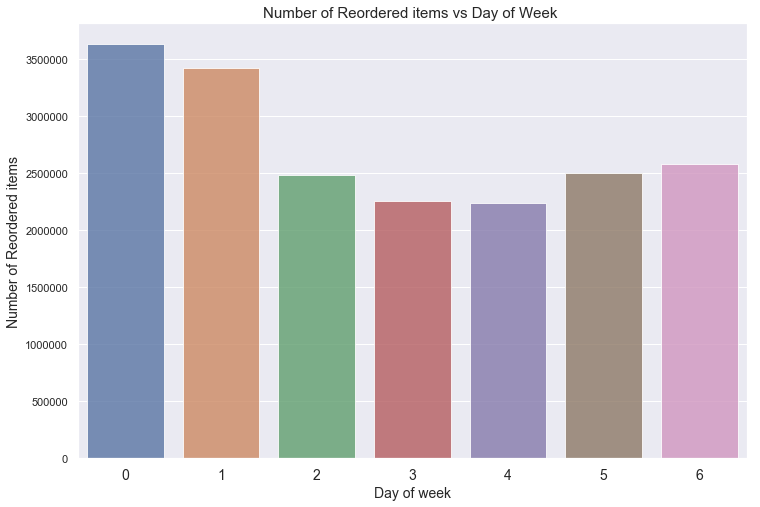

In [110]:
# Plotting the number of items which are re-ordered by day of week 
plt.figure(figsize=(12,8))
sns.barplot(temp.order_dow, temp.reordered, alpha=0.8)
plt.ylabel('Number of Reordered items', fontsize=14)
plt.xlabel('Day of week', fontsize=14)
plt.title('Number of Reordered items vs Day of Week ', fontsize=15)
plt.xticks(fontsize=14)
plt.show()

We see that the number of reordered items are high on weekends. But its possible that this is simply because the total number of items ordered on weekends is also high. So maybe nothing special. We can check the ratio of reordered vs. total to see if really there is anything special about weekend. 

In [115]:
temp=order_products_prior_df.groupby("order_hour_of_day")["reordered"].sum().reset_index()

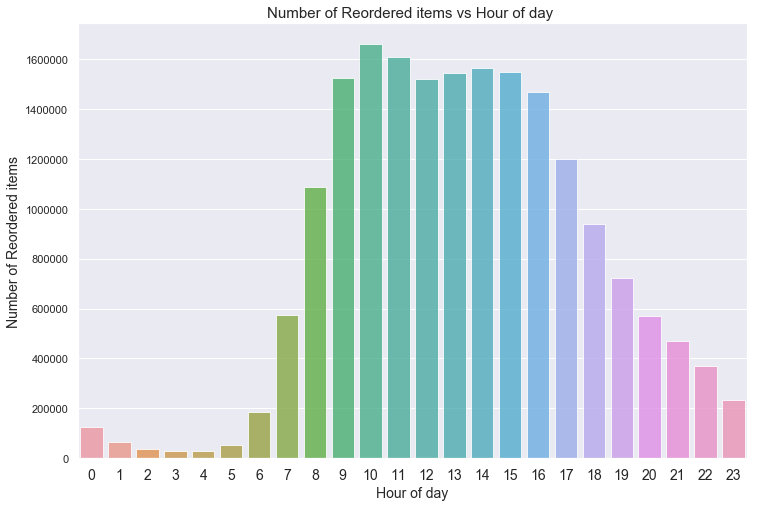

In [116]:
plt.figure(figsize=(12,8))
sns.barplot(temp.order_hour_of_day, temp.reordered, alpha=0.8)
plt.ylabel('Number of Reordered items', fontsize=14)
plt.xlabel('Hour of day', fontsize=14)
plt.title('Number of Reordered items vs Hour of day ', fontsize=15)
plt.xticks(fontsize=14)
plt.show()

Lets do some ratio calculations

In [117]:
temp=order_products_prior_df.groupby("order_dow").agg({'reordered':['count','sum']})

In [139]:
temp.head()

reordered         
              count      sum
order_dow                   
0           6209666  3634366
1           5665856  3421285
2           4217798  2487537
3           3844117  2253698
4           3787215  2238166

In [144]:
temp=order_products_prior_df.groupby("order_dow").agg({'reordered':['count','sum']})

In [145]:
temp.head()

reordered          reorder_ratio
              count      sum              
order_dow                                 
0           6209666  3634366      0.585276
1           5665856  3421285      0.603843
2           4217798  2487537      0.589771
3           3844117  2253698      0.586272
4           3787215  2238166      0.590979

In [118]:
temp["reorder_ratio"]=temp["reordered"]["sum"]/temp["reordered"]["count"]

In [119]:
temp

reordered          reorder_ratio
              count      sum              
order_dow                                 
0           6209666  3634366      0.585276
1           5665856  3421285      0.603843
2           4217798  2487537      0.589771
3           3844117  2253698      0.586272
4           3787215  2238166      0.590979
5           4209533  2506649      0.595470
6           4500304  2584835      0.574369

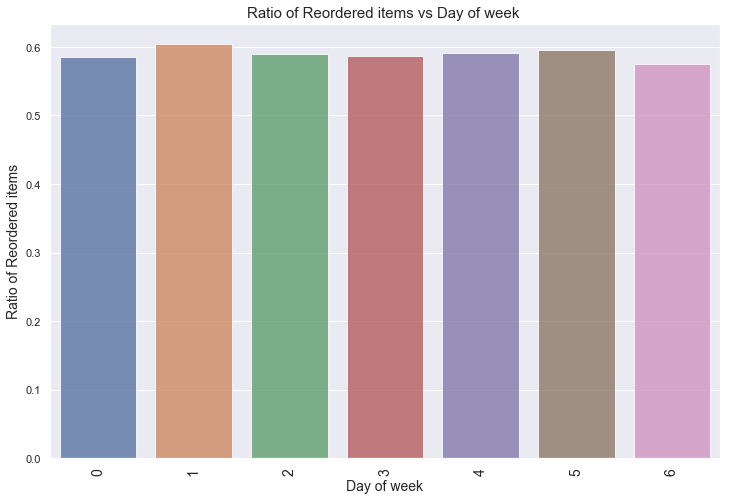

In [120]:
plt.figure(figsize=(12,8))
sns.barplot(temp.index, temp.reorder_ratio, alpha=0.8)
plt.ylabel('Ratio of Reordered items', fontsize=14)
plt.xlabel('Day of week', fontsize=14)
plt.title('Ratio of Reordered items vs Day of week ', fontsize=15)
plt.xticks(rotation='vertical',fontsize=14)
plt.show()

Nothing remarkable ...no real variation in this ratio between days of week. Saturdays and Sundays we have more orders and more reorders. Lets check hour of day

In [121]:
temp=order_products_prior_df.groupby("order_hour_of_day").agg({'reordered':['count','sum']})

In [122]:
temp["reorder_ratio"]=temp["reordered"]["sum"]/temp["reordered"]["count"]

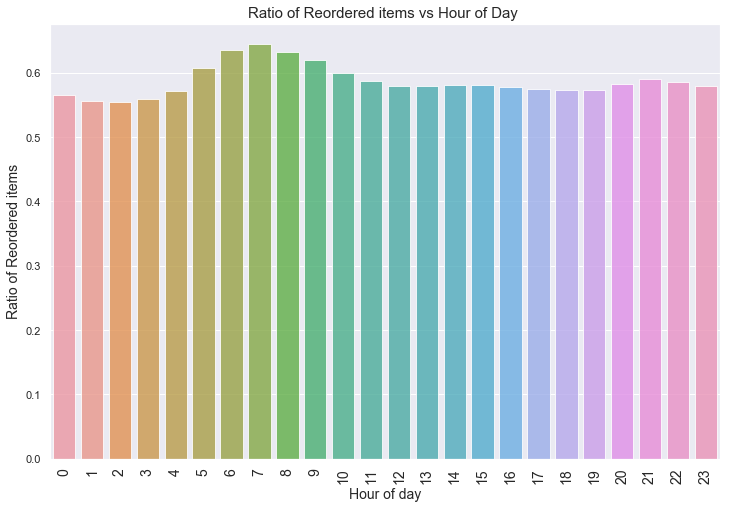

In [124]:
plt.figure(figsize=(12,8))
sns.barplot(temp.index, temp.reorder_ratio, alpha=0.8)
plt.ylabel('Ratio of Reordered items', fontsize=14)
plt.xlabel('Hour of day', fontsize=14)
plt.title('Ratio of Reordered items vs Hour of Day ', fontsize=15)
plt.xticks(rotation='vertical',fontsize=14)
plt.show()

We can see some higher reorder ratios for the early morning hours 5-9 am 

In [125]:
del temp

In [126]:
# How often do people order the same items again.
order_products_prior_df.head()

,order_id,product_id,add_to_cart_order,reordered,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2,33120,1,1,202279,3,5,9,8.0
1,2,28985,2,1,202279,3,5,9,8.0
2,2,9327,3,0,202279,3,5,9,8.0
3,2,45918,4,1,202279,3,5,9,8.0
4,2,30035,5,0,202279,3,5,9,8.0


In [128]:
re_ordered_proportion=np.sum(order_products_prior_df["reordered"])/len(order_products_prior_df["reordered"])

In [129]:
re_ordered_proportion

0.5896974667922161

In [130]:
unre_ordered_proportion=1-re_ordered_proportion

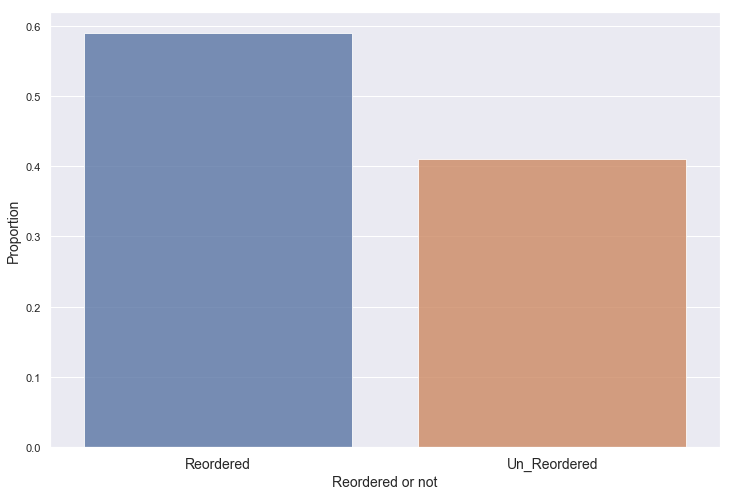

In [132]:
plt.figure(figsize=(12,8))
sns.barplot(["Reordered","Un_Reordered"], [re_ordered_proportion,unre_ordered_proportion], alpha=0.8)
plt.ylabel('Proportion', fontsize=14)
plt.xlabel('Reordered or not', fontsize=14)
plt.xticks(fontsize=14)
plt.show()

Lets find how many orders contain atleast one reordered product

In [134]:
temp= order_products_prior_df.groupby("order_id")["reordered"].sum().reset_index()

In [135]:
temp.head()

,order_id,reordered
0,2,6
1,3,8
2,4,12
3,5,21
4,6,0


In [136]:
ratio_order_withreorder=np.sum(temp["reordered"]>0)/len(temp["reordered"])

In [137]:
ratio_order_withreorder

0.8791514068669565

Nearly 88% of orders contain atleast one item which has been reordered. 12% of orders dont contain reordered products 

In [138]:
del temp

Now let us check which items are reordered to most in terms of absolute numbers. 

In [143]:
temp=order_products_prior_df[order_products_prior_df["reordered"]==1]["product_id"].value_counts().reset_index().rename(columns={"index":"product_id","product_id":"number of times reordered"})

In [146]:
temp=temp.merge(products_df,on="product_id").drop(["aisle_id","department_id"],axis=1)

In [148]:
temp=temp.head(10)

In [149]:
temp

,product_id,number of times reordered,product_name
0,24852,398609,Banana
1,13176,315913,Bag of Organic Bananas
2,21137,205845,Organic Strawberries
3,21903,186884,Organic Baby Spinach
4,47209,170131,Organic Hass Avocado
5,47766,134044,Organic Avocado
6,27845,114510,Organic Whole Milk
7,47626,106255,Large Lemon
8,27966,105409,Organic Raspberries
9,16797,99802,Strawberries


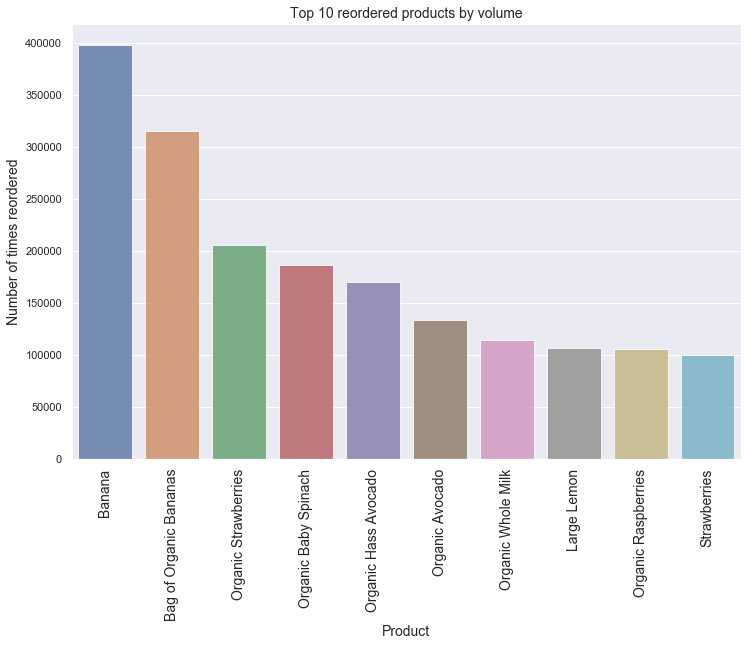

In [154]:
plt.figure(figsize=(12,8))
sns.barplot(temp["product_name"], temp["number of times reordered"], alpha=0.8)
plt.ylabel("Number of times reordered", fontsize=14)
plt.xlabel("Product", fontsize=14)
plt.title("Top 10 reordered products by volume",fontsize=14)
plt.xticks(rotation="vertical",fontsize=14)
plt.show()

We see that bananas are number 1 and just as we observed with products with highest number of orders, the topmost entries are fruits or vegetables with the exception of milk. Now let us look at ratios instead of absolute numbers. Which products have the highest reorder ratio? 

In [155]:
del temp

In [166]:
temp=order_products_prior_df.groupby("product_id").agg({'reordered':['count','sum']})
temp["reorder_ratio"]=temp["reordered"]["sum"]/temp["reordered"]["count"]

In [167]:
temp.head()

reordered       reorder_ratio
               count   sum              
product_id                              
1               1852  1136      0.613391
2                 90    12      0.133333
3                277   203      0.732852
4                329   147      0.446809
5                 15     9      0.600000

In [168]:
temp=temp.merge(products_df,on="product_id").drop(["aisle_id","department_id"],axis=1)

C:\Users\Ravi\Anaconda3\lib\site-packages\pandas\core\reshape\merge.py:544: UserWarning: merging between different levels can give an unintended result (2 levels on the left, 1 on the right)
  warnings.warn(msg, UserWarning)


In [174]:
temp.columns

Index([          'product_id', ('reordered', 'count'),   ('reordered', 'sum'),
        ('reorder_ratio', ''),         'product_name'],
      dtype='object')

In [176]:
temp=temp.rename(columns={('reorder_ratio', ''):'reorder_ratio'})

In [195]:
temp=temp.rename(columns={('reordered', 'count'):'reorder_count'})

In [199]:
temp.sort_values("reorder_ratio",ascending=False).head(10)

,product_id,reorder_count,"(reordered, sum)",reorder_ratio,product_name
6430,6433,68,64,0.941176,Raw Veggie Wrappers
2074,2075,87,81,0.931034,Serenity Ultimate Extrema Overnight Pads
43545,43553,13,12,0.923077,Orange Energy Shots
27734,27740,101,93,0.920792,Chocolate Love Bar
14605,14609,35,32,0.914286,Soy Powder Infant Formula
13871,13875,45,41,0.911111,Simply Sleep Nighttime Sleep Aid
39984,39992,22,20,0.909091,"Energy Shot, Grape Flavor"
5865,5868,30,27,0.900000,Russian River Valley Reserve Pinot Noir
31412,31418,60,54,0.900000,Sparking Water
35598,35604,100,90,0.900000,Maca Buttercups


In [198]:
temp[temp["reorder_count"]>500].sort_values("reorder_ratio",ascending=False).head(10)

,product_id,reorder_count,"(reordered, sum)",reorder_ratio,product_name
9288,9292,2921,2517,0.861691,Half And Half Ultra Pasteurized
45495,45504,9108,7835,0.860233,Whole Organic Omega 3 Milk
43386,43394,8477,7282,0.859030,Organic Lactose Free Whole Milk
5511,5514,3970,3405,0.857683,Organic Homogenized Whole Milk
47220,47231,1489,1277,0.857623,Ultra-Purified Water
29441,29447,20198,17256,0.854342,"Milk, Organic, Vitamin D"
38681,38689,35663,30338,0.850686,Organic Reduced Fat Milk
34191,34197,5185,4407,0.849952,Goat Milk
24848,24852,472565,398609,0.843501,Banana
31714,31720,9842,8279,0.841191,Organic Whole Milk


To compare reorder ratio, first I listed out the products without any constraints on the total number of orders. Then I listed out only those products which have been ordered more than 500 times. We see that the products are quite different. This is because some unpopular products can have high re-order ratio if they are ordered by the same user many times (but noone else orders them). 

In [200]:
temp=temp[temp["reorder_count"]>500].sort_values("reorder_ratio",ascending=False).head(10)

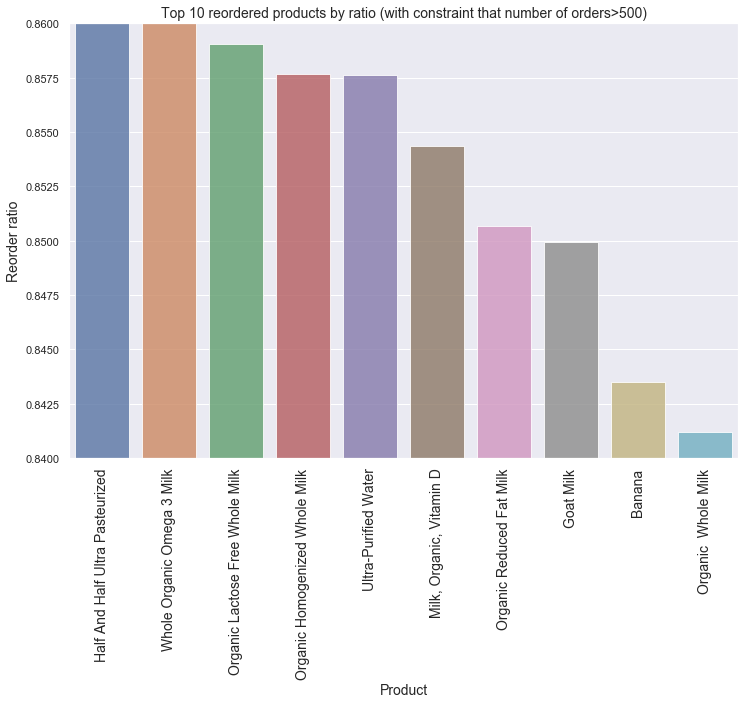

In [203]:
plt.figure(figsize=(12,8))
sns.barplot(temp["product_name"], temp["reorder_ratio"], alpha=0.8)
plt.ylabel("Reorder ratio", fontsize=14)
plt.xlabel("Product", fontsize=14)
plt.title("Top 10 reordered products by ratio (with constraint that number of orders>500)",fontsize=14)
plt.xticks(rotation="vertical",fontsize=14)
plt.ylim(0.84, 0.86)
plt.show()

In [205]:
products_df[products_df["product_id"]==27845]

,product_id,product_name,aisle_id,department_id
27844,27845,Organic Whole Milk,84,16


In [206]:
products_df[products_df["product_id"]==31720]

,product_id,product_name,aisle_id,department_id
31719,31720,Organic Whole Milk,84,16


Noticed that there are two different product_ids with everything else the same...product name, aisle and dept ids. Somthing to think about for later. 

Lets see if there is any association between time between orders and reorder

In [207]:
order_products_prior_df.head()

,order_id,product_id,add_to_cart_order,reordered,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2,33120,1,1,202279,3,5,9,8.0
1,2,28985,2,1,202279,3,5,9,8.0
2,2,9327,3,0,202279,3,5,9,8.0
3,2,45918,4,1,202279,3,5,9,8.0
4,2,30035,5,0,202279,3,5,9,8.0


In [208]:
del temp

In [210]:
temp=order_products_prior_df.groupby("days_since_prior_order")["reordered"].mean().reset_index()

In [211]:
temp.head()

,days_since_prior_order,reordered
0,0.0,0.738757
1,1.0,0.617624
2,2.0,0.645439
3,3.0,0.668612
4,4.0,0.677562


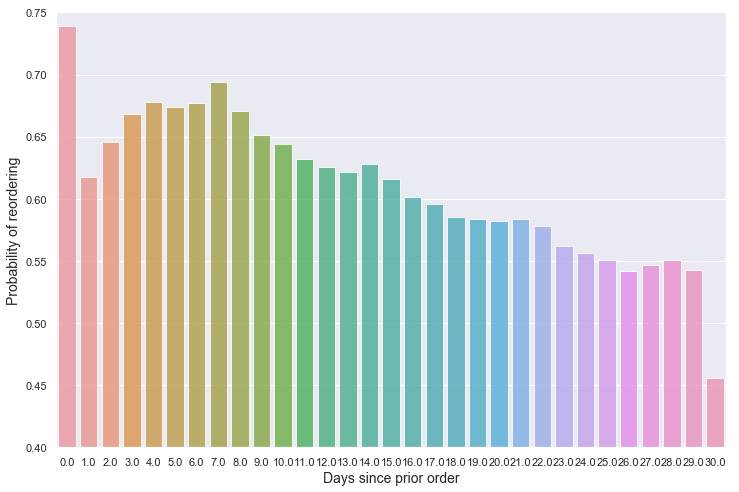

In [217]:
plt.figure(figsize=(12,8))
sns.barplot(temp["days_since_prior_order"], temp["reordered"], alpha=0.8)
plt.ylabel("Probability of reordering", fontsize=14)
plt.xlabel("Days since prior order", fontsize=14)
plt.ylim(0.4,0.75)
plt.show()

It seems that if somebody orders again on the same day, it is more likely than not that they are reordering the same product. Maybe because they ordered less? It will be interesting to see what kind of products are reordered on the same day. Again, there are smaller peaks at 7, 14 , 21 and 28 days. At 30 there is a reasonably big drop which indicates that items which are ordered less frequently (more than or equal to 30 days between orders) have less probability of being reordered because customers may want some of these products rarely. 

Now let us examine the association between number of total orders of a product and the probability of that product being reordered

In [218]:
temp=order_products_prior_df.groupby("product_id").agg({'reordered':['count','mean']})

In [220]:
temp.head()

reordered          
               count      mean
product_id                    
1               1852  0.613391
2                 90  0.133333
3                277  0.732852
4                329  0.446809
5                 15  0.600000

In [221]:
temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49677 entries, 1 to 49688
Data columns (total 2 columns):
(reordered, count)    49677 non-null int64
(reordered, mean)     49677 non-null float64
dtypes: float64(1), int64(1)
memory usage: 1.1 MB


In [225]:
temp.columns

MultiIndex(levels=[['reordered'], ['count', 'mean']],
           labels=[[0, 0], [0, 1]])

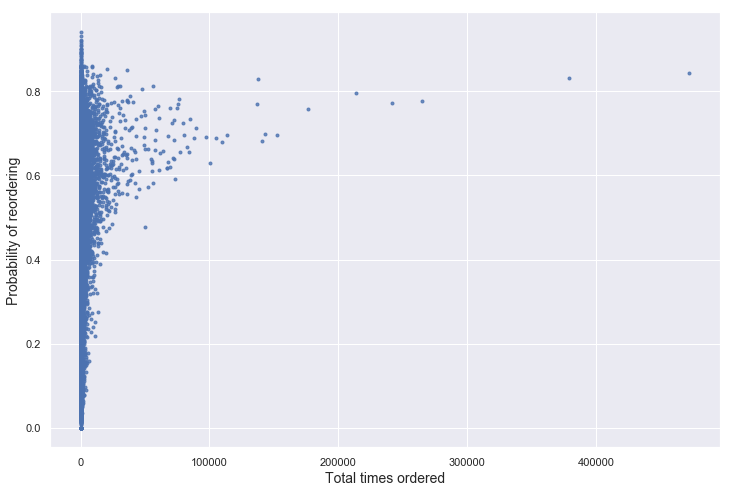

In [228]:
plt.figure(figsize=(12,8))
plt.plot(temp["reordered"]["count"], temp["reordered"]["mean"], marker='.',linestyle="none",alpha=0.8)
plt.ylabel("Probability of reordering", fontsize=14)
plt.xlabel("Total times ordered", fontsize=14)
#plt.ylim(0.4,0.75)
plt.show()

We can see that items which have been ordered lower number of times have probability of reordering all across the spectrum. On the other hand, items which are ordered a lot have higher probability of being reordered (which makes sense). 